In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 样本

## 样本生成
用于生成（0,1]间的随机数  
缺点：不能很好的控制各亚组的样本数量

# H0m=m0 v.s. H1:m>m0 下的参数估计

In [2]:
def normal(x,theta):
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)**2/(2*s**2))
    return result

def mixnormal(x,theta):
    m=theta.shape[1]
    result=0
    for i in range(m):
        result+=theta[0,i]*normal(x,theta[1:,i])
    return result

def Lih(X,theta):
    num=X.shape[0]
    C=theta.shape[1]
    Ga=np.zeros((num,C))
    c=np.zeros(C)

    for j in range(num):#响应度
        for k in range(C):
            c[k]=theta[0,k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    return Ga

In [3]:
data0=np.loadtxt("C:/Users/Administrator/Desktop/a.csv",delimiter=",")

In [4]:
Ca=1
tp=0.068

In [5]:
def ps(x,y,an=0.25):#对方差的惩罚函数
    z=-an*(np.log(x**2/y**2)+(y**2/x**2)-1)
    return z

def pa(α):#对系数的惩罚函数
    z=Ca*np.log(1-abs(1-2*α))
    return z

## H0下的最大惩罚似然计算

In [6]:
'''
原假设下的惩罚对数似然,这里只对方差惩罚，不对α惩罚
因为H0为m=1时有惩罚似然最大中在α=0.5取到，自然设置α=0.5
H0为m=m0>=2时，有充分的理由认为不会发生不可识别问题，即αh(h=1,2,...,m0)不会落在界点上
'''
def pl0(data,theta,tp):
    n=data.shape[0]
    m=theta.shape[1]
    y=np.zeros(n)
    ssvar=np.var(data)
    a=0
    for h in range(m):
        a+=ps(theta[2,h],ssvar,tp)
    for i in range(n):
        y[i]=np.log(mixnormal(data[i],theta))
    z=np.sum(y)+a
    return z

In [7]:
def ECMforH0(data,thetaold,theta0):
    num=data.shape[0]
    L0=Lih(data,thetaold)
    C=thetaold.shape[1]
    d=np.zeros(C)
    thetanext=np.zeros((3,C))

    datanew=data
    for k in range(C):#更新参数
        d[k]=np.sum(L0[:,k])
        thetanext[0,k]=d[k]/num
        thetanext[1,k]=np.dot(L0[:,k],datanew[:])/d[k]
        thetanext[2,k]=np.sqrt((np.dot(L0[:,k],(datanew[:]-thetanext[1,k])**2)+2*tp*theta0[2,k])/(d[k]+2*tp))#标准差

    return thetanext


In [44]:
def iterECMforH0(data,theta0,N=1000):
    T0=theta0
    for i in range(N):
        T0=ECMforH0(data,T0,theta0)

    return T0,i

### 获取H0下的最优估计

#### beta的初值

#### 其他参数的初值选取

#### H0:m=1

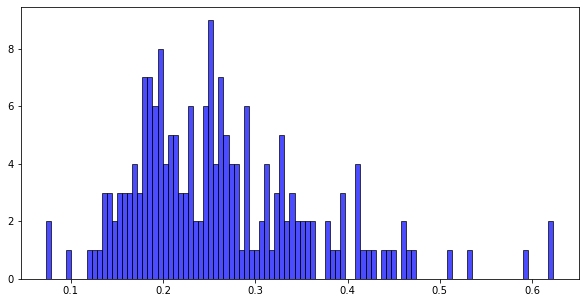

In [9]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax1.hist(data0, bins=100,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

In [10]:
smean=np.mean(data0)
sstd=np.std(data0)
ssvar=np.var(data0)
stheta0=np.array([[0.5],[smean],[sstd]])
stheta0#样本均值与样本的标准差

array([[0.5       ],
       [0.26322632],
       [0.09831687]])

In [11]:
sr00=pl0(data0,stheta0,tp=0.25)
sr00

38.507853786571495

#### H0:m>=2（待改进）

In [12]:
m0=2#H0的假设
weight0=[0.6,0.4]
mean0=[0.2,0.3]
#分位数定均值初值
covs0=[0.05,0.05]
theta0=np.array([weight0,mean0,covs0])

In [13]:
print(' 初值:\n','参数初值:\n',theta0)

 初值:
 参数初值:
 [[0.6  0.4 ]
 [0.2  0.3 ]
 [0.05 0.05]]


In [14]:
result=iterECMforH0(data0,theta0,50)
result

(array([[0.66700302, 0.33299698],
        [0.22104328, 0.3477202 ],
        [0.05733803, 0.10918555]]),
 49)

In [15]:
result[0][2]**2

array([0.00328765, 0.01192149])

In [16]:
thetaH0=result[0]

In [17]:
#H0下的惩罚似然
sr01=pl0(data0,thetaH0,tp)
sr01

187.60295004539233

## H1下的似然计算

#混合正态的惩罚联合对数似然,注意这里的x为Yi-Xi.T*beta,k表示第k个初始值
def pl1(k,data,theta,th0,C=1):
    n=data.shape[0]
    m=th0.shape[1]
    y=np.zeros(n)
    a=0
    for h in range(m):
        a+=ps(theta[2,(2*h)],th0[2,h],tp)+ps(theta[2,(2*h+1)],th0[2,h],tp)+pa(theta[0,2*h],C)+pa(theta[k,(2*h+1)],C)
    for i in range(n):
        y[i]=np.log(mixnormal(data[i],theta))
    z=np.sum(y)+a
    return z

In [18]:
#混合正态的惩罚联合对数似然,注意这里的x为Yi-Xi.T*beta
def pl1(k,data,theta,th0):
    n=data.shape[0]
    m=th0.shape[1]
    y=np.zeros(n)
    a=0
    for h in range(m):
        a+=ps(theta[2,(2*h)],th0[2,h],tp)+ps(theta[2,(2*h+1)],th0[2,h],tp)+pa(aa[k,h])
    for i in range(n):
        y[i]=np.log(mixnormal(data[i],theta))
    z=np.sum(y)+a
    return z

In [52]:
#用来对固定权重迭代参数的ECM，不更新权重
def ECMff(data,thetaold,theta0):
    L0=Lih(data,thetaold)
    C=thetaold.shape[1]
    d=np.zeros(C)
    thetanext=np.zeros((3,C))

    datanew=data
    for k in range(C):#更新参数
        d[k]=np.sum(L0[:,k])
        thetanext[0,k]=theta0[0,k]#这里不更新权重
        thetanext[1,k]=np.dot(L0[:,k],datanew[:])/d[k]
        thetanext[2,k]=np.sqrt((np.dot(L0[:,k],(datanew[:]-thetanext[1,k])**2)+2*tp*theta0[2,k])/(d[k]+2*tp))#标准差

    return thetanext


In [45]:
def iterECMff(data,theta0,N=1000):
    T0=theta0
    for i in range(N):
        T0=ECMff(data,T0,theta0)
    return T0,i

In [62]:
#对于H1下的一次迭代的参数估计
def ECMforH1(data,thetaold,theta0):
    num=data.shape[0]
    L0=Lih(data,thetaold)
    C=thetaold.shape[1]
    d=np.zeros(C)
    thetanext=np.zeros((3,C))


    datanew=data
    for k in range(C):#更新参数
        d[k]=np.sum(L0[:,k])
        if (d[k]/num) <= 0.5:
            if (d[k]+Ca)/(num+Ca) <= 0.5:
                thetanext[0,k]=(d[k]+Ca)/(num+Ca)
            else:
                thetanext[0,k]=0.5
        else:
            if ((d[k])/(num+Ca)) > 0.5:
                thetanext[0,k]=(d[k]+C)/(num+Ca)
            else:
                thetanext[0,k]=0.5

        thetanext[1,k]=np.dot(L0[:,k],datanew[:])/d[k]
        thetanext[2,k]=np.sqrt((np.dot(L0[:,k],(datanew[:]-thetanext[1,k])**2)+2*tp*theta0[2,k])/(d[k]+2*tp))#标准差

    return thetanext


In [77]:
def iterECMforH1(data,theta0,N=1000):
    T0=theta0
    for i in range(N):
        T0=ECMforH1(data,T0,theta0)

    return T0,i

### step 0 设定不同的初值
m0个数组的排列问题  
当m0为确定的数时，只需要套m0个循环即可  
如果m0未知，无法用上述想法做了，可以将循环问题转为递归问题  
或者用查询的方法做

In [23]:
m0=2

In [24]:
Weight=np.array([0.1,0.9,0.3,0.7,0.5])
Weight0=np.zeros((5**m0,2*m0))#H1下的初始权重
aa=np.zeros((5**m0,m0))

In [25]:
for i in range (5**m0):
    for j in range(m0):
        a=np.floor(i/(5**(m0-j-1)))
        if a>4:
            a=a-5*np.floor(a/5)
        b=int(a)
        aa[i,j]=Weight[b]
        Weight0[i,2*j]=Weight[b]*thetaH0[0,j]
        Weight0[i,2*j+1]=(1-Weight[b])*thetaH0[0,j]

### step 1 固定参数的不同初值下，分别选取使得惩罚似然达到最大的正态参数
（ECMff多次迭代即可）

In [28]:
thetaH0

array([[0.66700302, 0.33299698],
       [0.22104328, 0.3477202 ],
       [0.05733803, 0.10918555]])

In [32]:
result[0]

array([[0.66700302, 0.33299698],
       [0.22104328, 0.3477202 ],
       [0.05733803, 0.10918555]])

In [93]:
Weight0[-5:]

array([[0.33350151, 0.33350151, 0.0332997 , 0.29969728],
       [0.33350151, 0.33350151, 0.29969728, 0.0332997 ],
       [0.33350151, 0.33350151, 0.09989909, 0.23309789],
       [0.33350151, 0.33350151, 0.23309789, 0.09989909],
       [0.33350151, 0.33350151, 0.16649849, 0.16649849]])

In [83]:
Th=np.zeros((5**m0,3,2*m0))
for i in range(5**m0):
    thetan=np.array((Weight0[i],[0.15,0.25,0.3,0.4],[0.025,0.025,0.05,0.05]))
    res=iterECMff(data0,thetan,100)
    Th[i]=res[0]

'''
Th[i]表示第i个权重初值下的最佳参数初值  
Be[i]表示第i个权重初值下的最佳斜率初值  
以上均作为最早的初值参与迭代
'''

'\nTh[i]表示第i个权重初值下的最佳参数初值  \nBe[i]表示第i个权重初值下的最佳斜率初值  \n以上均作为最早的初值参与迭代\n'

### step 2 分别选定初始参数后的迭代（只需迭代几次）

In [84]:
rs=np.zeros(5**m0)
Th1=np.zeros((5**m0,3,2*m0))
for i in range(5**m0):
    res=iterECMforH1(data0,Th[i],30)
    Th1[i]=res[0]
    rs[i]=pl1(i,data0,Th1[i],stheta0)

In [86]:
rs

array([193.21941529, 193.33555006, 193.14321315, 193.25445746,
       193.21779225, 192.88774514, 193.30425704, 193.13441399,
       193.23518015, 193.20641684, 191.57570411, 191.60366297,
       191.47121383, 191.55557854, 191.52459118, 191.38637533,
       191.5436225 , 191.40555639, 191.47608481, 191.44695687,
       192.04073936, 192.08843273, 191.92277163, 192.01534599,
       191.9722435 ])

In [87]:
2*(rs-sr01)

array([11.23293049, 11.46520003, 11.0805262 , 11.30301482, 11.22968442,
       10.56959019, 11.40261398, 11.06292788, 11.2644602 , 11.20693358,
        7.94550813,  8.00142585,  7.73652758,  7.90525698,  7.84328226,
        7.56685057,  7.88134491,  7.6052127 ,  7.74626953,  7.68801366,
        8.87557864,  8.97096538,  8.63964318,  8.82479189,  8.73858692])

In [88]:
np.max(2*(rs-sr01))

11.465200030569974

In [89]:
zx=np.where(2*(rs-sr01)==np.max(2*(rs-sr01)))

In [90]:
Th1[zx]

array([[[0.11676033, 0.61661928, 0.21988919, 0.07814482],
        [0.30199093, 0.21389966, 0.32213226, 0.43350878],
        [0.09419427, 0.0538599 , 0.08251247, 0.12572828]]])

### step 3
每次找出使得H1下惩罚似然达到最大的那个初始参数，计算对应的似然比统计量

# EM值计算

## ECM的迭代算法
```
def iterECM(Xs,Y,beta0,theta0,tp=0.002,N=1000,ε=0.005):
    T0=[beta0,theta0]
    for i in range(N):
        a=T0[0]
        T0=ECM(Xs,Y,T0[0],T0[1],theta0,tp)
        b=np.linalg.norm(T0[0]-a)
        '''
        if b<=ε:
            break
        '''
    return T0,b,i
```

In [ ]:
np.savetxt('b.csv',data0,delimiter=",")

In [ ]:
Data=np.loadtxt("C:/Users/Administrator/Desktop/a.csv",delimiter=",")

In [ ]:
alpha=[0.1,0.2,0.3]
for i in range(3):
    